<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Work_in_progress/Air_quality_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality Data**

This notebook documents my work on Air Quality data using Python. We will be using air-quality measurement, particularly, Nitrogen dioxide levels and Particulate Matter (PM10) data from Chatham roadside and Edinburgh measuring centres and use python to retrieve, wrangle, clean, sort and filter the data, analyse and visualise the data to make conclusions on the air quality levels in these two places. The analyses in this notebook looks at Nitrogen dioxide levels and PM10 in these two places and can be repeated for any other pollutants and/or places.

The first part of the notebook documents my work on air quality data on Nitrogen dioxide measurements from Chatham Roadside, Kent Edinburgh Haymarket area and St. Leonard's street. The second part of the notebook documents my work on PM10 from Chatham Roadside and Edinburgh St. Leonard's street.

##What is Air quality and what data is available on it?
**Source:** Department for Environment Food and Rural affairs (Defra), UK: https://uk-air.defra.gov.uk/air-pollution/

Air pollution can cause both short term and long term effects on health and many people are concerned about pollution in the air that they breathe. 

These people may include:

* People with heart or lung conditions, or other breathing problems, whose health may be affected by air pollution.
* Parents, carers and healthcare professionals who look after someone whose health is sensitive to pollution.
* People who want to know more about air pollution, its causes, and what they can do to help reduce it.
* The scientific community and students, who may need data on air pollution levels, either now or in the past, throughout the UK.

Free, detailed, clear and easy to use information on air pollution in the UK is available for all these purposes at UK's Defra, website on air pollution (link above).

## 1. Nitrogen Dioxide: 
**Source:** https://www.gov.uk/government/statistics/emissions-of-air-pollutants/emissions-of-air-pollutants-in-the-uk-nitrogen-oxides-nox 

In this section of this notebook, we will look at the measured value of Nitrogen dioxide levels in the air. Nitrogen dioxide, in the UK, mostly come from fuel combustion and is harmful to health. 

Short-term exposure to concentrations of NO2 can cause inflammation of the airways and increase susceptibility to respiratory infections and to allergens. NO2 can exacerbate the symptoms of those already suffering from lung or heart conditions. In addition, NOx can cause changes to the environment. Deposition of Nitrogen to the environment both directly as a gas (dry deposition) and in precipitation (wet deposition) can change soil chemistry and affect biodiversity in sensitive habitats.

Nitrogen oxides are also precursors for the formation of ozone. Ozone is a gas which is also damaging to human health and can trigger inflammation of the respiratory tract, eyes, nose and throat as well as asthma attacks. Moreover, ozone can have adverse effects on the environment through oxidative damage to vegetation including crops.

**Data:**

There are over 1500 sites across the UK that monitor air quality. They are organised into networks that gather a particular kind of information, using a particular method. There are two major types - automatic and non-automatic networks. The Monitoring Networks section provides further network information. All the measurements from these monitoring stations are available to download data from the networks using the Data Selector Tool via Defra website.

https://uk-air.defra.gov.uk/data/

I have chosen to work with measured data from Chatham Roadside and Edinburgh St. Leonard street stations in this notebook. The functions and code in this notebook can be used to repeat the same analyses for data from any other monitoring stations in the UK.

The following data files contains measured values of Nitrogen dioxide in the air collected at a roadside monitoring station at Chatham, Kent and St. Leonard's Street, Edinburgh. Access to data from these two air quality monitoring stations were obtained from DEFRA website (https://uk-air.defra.gov.uk/data/) and has been uploaded to my github. They can be found at: 

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Kent.csv

https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Edin.csv

respectively.

The datasets obtained from DEFRA contain:
* a heading line (with station name) which will be skipped while loading the data and a separate column for each station will be created later when wrangling the dataframes to create a new dataset.
* dates are given rather as texts (so need to be converted to dates)
* times which are not all in the same format will also need to be converted to dates along with Date column.
* Nitrogen Dioxide levels which are, again, text sometimes contain "No data". This column needs to be converted to a numeric column with null values instead or "No data".
* Status which is always the same shows the unit of measurement for Nitrogen dioxide levels.

### Read, clean, sort and wrangle the data and write it to Pandas dataframe.

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with 'No data' in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column


In [70]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone

def get_csv_data(url):
  data = pd.read_csv(url, skiprows=1)
  return data

def data_clean_wrangle(project_data,column,new_name):
  project_data['Date'] =  pd.to_datetime(project_data['Date'], format= "%d/%m/%Y")
  project_data[column] = project_data[column].replace('No data', np.nan)
  project_data[column] = pd.to_numeric(project_data[column], downcast="float")
  project_data['Weekdays'] = project_data['Date'].dt.weekday
  project_data['Day_of_the_week'] = project_data['Date'].dt.day_name()
  project_data = project_data.rename(columns={column: new_name})
  project_data = project_data.drop(columns=['Status'])
  return project_data

url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Edin.csv"
data = get_csv_data(url)
Edin_data = data_clean_wrangle(data, "Nitrogen dioxide","NO2 Level (V ug/m2)")

Did the data cleaning and sorting work?

In [71]:
print(Edin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 35088 non-null  datetime64[ns]
 1   Time                 35088 non-null  object        
 2   NO2 Level (V ug/m2)  33014 non-null  float32       
 3   Weekdays             35088 non-null  int64         
 4   Day_of_the_week      35088 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.2+ MB
None


Let us take a look at the dataset for Edinburgh.

In [72]:
print(Edin_data.head())

        Date      Time  NO2 Level (V ug/m2)  Weekdays Day_of_the_week
0 2017-03-01  01:00:00                  NaN         2       Wednesday
1 2017-03-01  02:00:00                  NaN         2       Wednesday
2 2017-03-01  03:00:00                  NaN         2       Wednesday
3 2017-03-01  04:00:00                  NaN         2       Wednesday
4 2017-03-01  05:00:00                  NaN         2       Wednesday


Now let's repeat the same for Chatham data.

Let's look at the data from Chatham.

In [73]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/NO2_Kent.csv"
data = get_csv_data(url)
chatham_data = data_clean_wrangle(data, "Nitrogen dioxide","NO2 Level (V ug/m2)")

In [74]:
print(chatham_data.shape)
print(chatham_data.head())
print(chatham_data.info())

(35088, 5)
        Date      Time  NO2 Level (V ug/m2)  Weekdays Day_of_the_week
0 2017-03-01  01:00:00              4.41596         2       Wednesday
1 2017-03-01  02:00:00              2.82604         2       Wednesday
2 2017-03-01  03:00:00              3.31484         2       Wednesday
3 2017-03-01  04:00:00              3.31149         2       Wednesday
4 2017-03-01  05:00:00              5.53478         2       Wednesday
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 35088 non-null  datetime64[ns]
 1   Time                 35088 non-null  object        
 2   NO2 Level (V ug/m2)  34588 non-null  float32       
 3   Weekdays             35088 non-null  int64         
 4   Day_of_the_week      35088 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
mem

Now let's put the two NO2 level datasets from Edinburgh and Chatham together into one dataframe. Since both of them have the same column names, let's rename them first.

In [75]:
Edin_data.rename(columns = {'NO2 Level (V ug/m2)':'Edin_NO2_Level'}, inplace = True)
chatham_data.rename(columns = {'NO2 Level (V ug/m2)':'Chatham_NO2_Level'}, inplace = True)

Next let's create a new dataframe Nitrogen_data.

In [76]:
Nitrogen_data = Edin_data.copy()
Nitrogen_data['Chatham_NO2_Level'] = chatham_data['Chatham_NO2_Level']
Nitrogen_data

,Date,Time,Edin_NO2_Level,Weekdays,Day_of_the_week,Chatham_NO2_Level
0,2017-03-01,01:00:00,NaN,2,Wednesday,4.415960
1,2017-03-01,02:00:00,NaN,2,Wednesday,2.826040
2,2017-03-01,03:00:00,NaN,2,Wednesday,3.314840
3,2017-03-01,04:00:00,NaN,2,Wednesday,3.311490
4,2017-03-01,05:00:00,NaN,2,Wednesday,5.534780
...,...,...,...,...,...,...
35083,2021-03-01,20:00:00,NaN,0,Monday,22.479891
35084,2021-03-01,21:00:00,NaN,0,Monday,18.130960
35085,2021-03-01,22:00:00,NaN,0,Monday,25.372990
35086,2021-03-01,23:00:00,NaN,0,Monday,24.558630


Let's rearrange the columns so the two nitrogen levels are next to each other.

In [77]:
Nitrogen_data = Nitrogen_data[['Date', 'Time', "Edin_NO2_Level", 'Chatham_NO2_Level', 'Weekdays', 'Day_of_the_week']]

Let's now take a look at the new dataframe:

In [78]:
Nitrogen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35088 entries, 0 to 35087
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               35088 non-null  datetime64[ns]
 1   Time               35088 non-null  object        
 2   Edin_NO2_Level     33014 non-null  float32       
 3   Chatham_NO2_Level  34588 non-null  float32       
 4   Weekdays           35088 non-null  int64         
 5   Day_of_the_week    35088 non-null  object        
dtypes: datetime64[ns](1), float32(2), int64(1), object(2)
memory usage: 1.3+ MB


We have null values in both NO2 levels columns. This will make it difficult for further analyses. So, let's get rid of the null values in both NO2 columns.


In [79]:
Nitrogen_data = Nitrogen_data.dropna(subset = ["Edin_NO2_Level", 'Chatham_NO2_Level'])

Now that the null values are gone, let's get some basic statistics.

In [80]:
Nitrogen_data.describe()

,Edin_NO2_Level,Chatham_NO2_Level,Weekdays
count,32565.000000,32565.000000,32565.000000
mean,17.858732,22.502911,3.024628
std,14.722378,14.758221,2.002718
min,0.103840,0.054630,0.000000
25%,7.388240,11.140810,1.000000
50%,13.457740,19.195709,3.000000
75%,23.722401,30.881430,5.000000
max,108.297943,113.061890,6.000000


Clearly, the mean values of Nitrogen dioxide levels in Chatham is higher than Edinburgh. Let's take a look at the overall distribution, quartile values, min and maximum of the $NO_{2}$ levels in both Chatham and Edinburgh using boxplot.

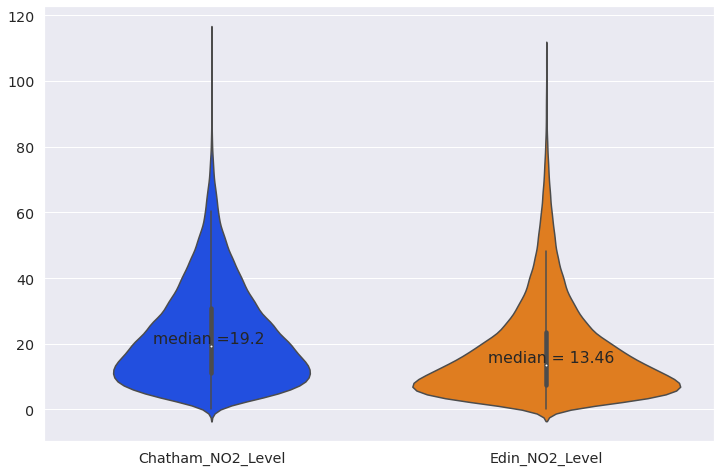

In [105]:
from seaborn.categorical import violinplot
import seaborn as sns
def do_violin_plot(df, column1, column2, y_label):
  sns.set(rc={'figure.figsize':(12,8)})
  sns.set(font_scale=1.3) 
  sns.set_palette("bright")
  median1 = round(df[column1].median(),2)
  median2 = round(df[column2].median(),2)
  medians = [median1, median2]
  xposlist = range(len(medians))
  stringlist = ['median ='+ str(median1),'median = '+ str(median2)]
  ax = sns.violinplot(data=df[[column1, column2]], inner="box")
  for i in range(len(stringlist)):
      ax.text(xposlist[i]-0.175, medians[i]+1, stringlist[i])
  return

do_violin_plot(Nitrogen_data, 'Chatham_NO2_Level', 'Edin_NO2_Level', "$NO_{2}$ Level (V ug/m2)")

The above chart and statistics shows us the average, standard deviation, quartles and the overall distribution of $NO_{2}$ in these two places. Clearly Edinburgh has more measurements that show lower levels of $NO_{2}$ emmisions compared to Chatham. But let's compare the hourly and daily measurements trends over all the years in the two stations. 

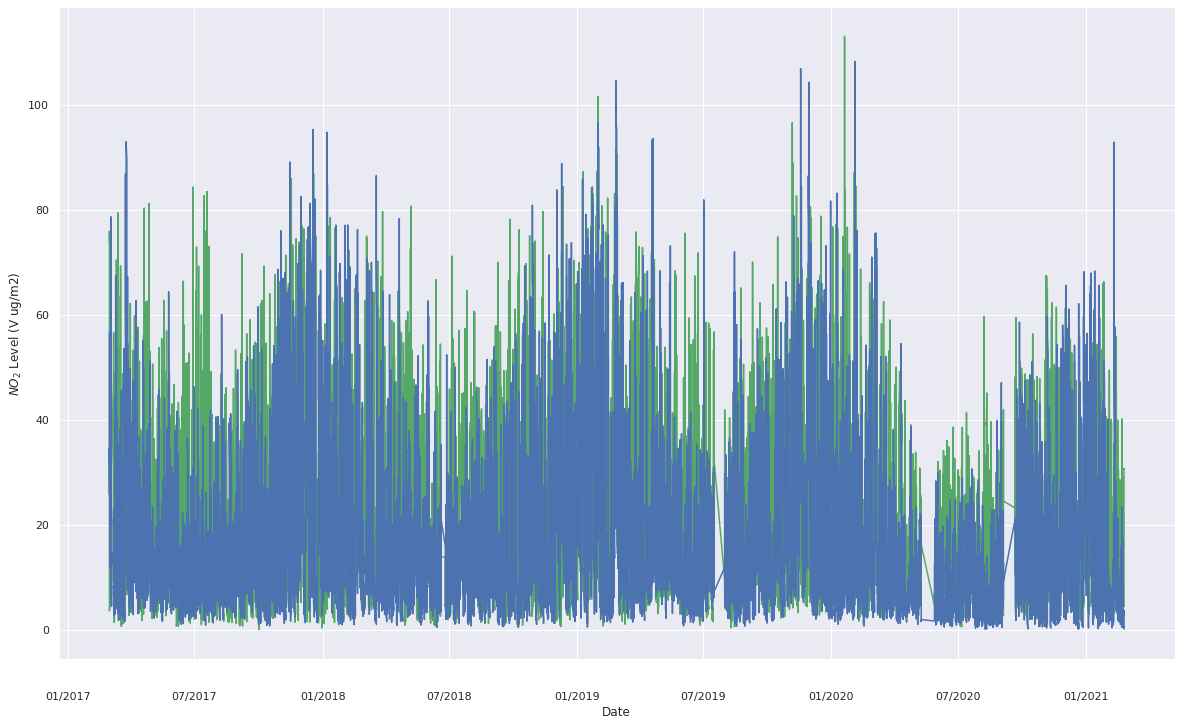

In [100]:
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

def do_line_plot_columns(df, column1, column2,column3,x_label,y_label):
  fig, ax1 = plt.subplots(figsize=(20, 12))
  ax1.set(xlabel=x_label, ylabel=y_label)
  ax1.plot(Nitrogen_data[column1], Nitrogen_data[column2], color='g')
  ax1.plot(Nitrogen_data[column1], Nitrogen_data[column3], color='b')
  ax1.xaxis.set(major_formatter=mdates.DateFormatter("\n\n%m/%Y"))
  plt.show()
  return

do_line_plot_columns(Nitrogen_data,"Date", "Chatham_NO2_Level","Edin_NO2_Level",'Date','$NO_{2}$ Level (V ug/m2)')

From the above graph it looks like that both monitoring stations recorded lower levels of $NO_{2}$ emmisions in later part of 2020 (perhaps due to lockdown). So let's look at the total $NO_{2}$ emmissions by the year.

Let's create a new dataframe for th yearly data so that the sorted and grouped data can be stored separately.

In [83]:
yearly_data = Nitrogen_data.copy()
yearly_data['year'] = yearly_data['Date'].dt.year
yearly_data

,Date,Time,Edin_NO2_Level,Chatham_NO2_Level,Weekdays,Day_of_the_week,year
8,2017-03-01,09:00:00,56.689690,73.884659,2,Wednesday,2017
9,2017-03-01,10:00:00,51.444340,34.998268,2,Wednesday,2017
10,2017-03-01,11:00:00,36.054932,38.798409,2,Wednesday,2017
12,2017-03-01,13:00:00,25.692530,38.773071,2,Wednesday,2017
13,2017-03-01,14:00:00,27.418079,25.064751,2,Wednesday,2017
...,...,...,...,...,...,...,...
34948,2021-02-24,05:00:00,0.695030,6.934030,2,Wednesday,2021
34949,2021-02-24,06:00:00,0.848670,11.319860,2,Wednesday,2021
34950,2021-02-24,07:00:00,1.811830,15.248120,2,Wednesday,2021
34951,2021-02-24,08:00:00,3.683820,30.662081,2,Wednesday,2021


Group the data by year and Day of the week - this will allow us to look at yearly trends as well as to identify which days in the week has higher emmisions of $NO_{2}$.

In [84]:
yearly_data = yearly_data.groupby(by = ['year', 'Day_of_the_week'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
yearly_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,Day_of_the_week,Chatham_NO2_Level,Edin_NO2_Level
0,2017,Friday,25.710041,21.036032
1,2017,Monday,23.940300,18.426754
2,2017,Saturday,22.779654,18.603403
3,2017,Sunday,17.068417,16.605040
4,2017,Thursday,26.988962,20.456272
5,2017,Tuesday,26.677376,18.105906
6,2017,Wednesday,23.503975,18.739988
7,2018,Friday,26.116222,19.303839
8,2018,Monday,24.346972,19.534292
9,2018,Saturday,22.299091,16.860706


First let's find the yearly average.

In [85]:
yearly_ave = yearly_data.groupby(by = ['year'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
yearly_ave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,year,Chatham_NO2_Level,Edin_NO2_Level
0,2017,23.809818,18.853342
1,2018,23.453270,17.920425
2,2019,24.554691,20.840216
3,2020,18.689884,13.757909
4,2021,19.108713,17.238684


Visualise the yearly pattern between the two stations.

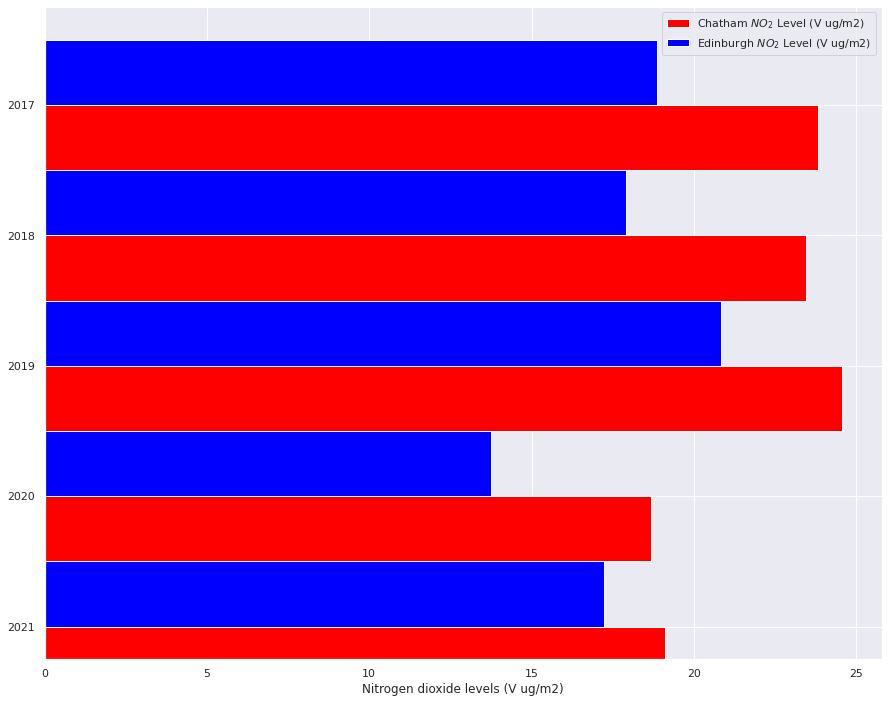

In [86]:
x = yearly_ave['year']
y1 = yearly_ave.Chatham_NO2_Level
y2 = yearly_ave.Edin_NO2_Level

def do_bar_plot1(x,y1,y2, x_label,legend):
  x_pos = [i for i, _ in enumerate(x)]
  plt.figure(figsize = (15,12))
  bar_plot = y1.plot(x="year", y=y1, kind="barh", color ='red', position =0)
  bar_plot = y2.plot(x="year", y=y2, kind="barh", color ='blue', position =1)
  plt.legend(legend,loc=1)
  plt.yticks(x_pos, x)
  plt.gca().invert_yaxis()
  plt.xlabel(x_label)
  plt.show()
  return

do_bar_plot1(x,y1,y2,"Nitrogen dioxide levels (V ug/m2)",['Chatham $NO_{2}$ Level (V ug/m2)', 'Edinburgh $NO_{2}$ Level (V ug/m2)'])

Every year, the average emmison of $NO_{2}$ is higher in Chatham than in Edinburgh. Year 2020 shows a dramatic decrease in the the average emmison of $NO_{2}$ in both places. This is most likely due to the Covid-19 related lockdown.

Which days in the week has higher average emmison of $NO_{2}$?

In [87]:
weekly_ave = yearly_data.groupby(by = ['Day_of_the_week'])['Chatham_NO2_Level','Edin_NO2_Level'].mean().reset_index()
weekly_ave

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Day_of_the_week,Chatham_NO2_Level,Edin_NO2_Level
0,Friday,24.394238,19.223583
1,Monday,22.335760,16.682114
2,Saturday,20.330767,16.151476
3,Sunday,16.485897,15.091596
4,Thursday,23.849905,19.081661
5,Tuesday,22.609055,18.629635
6,Wednesday,23.457310,19.194740


Let's look at the week days average trend for both places

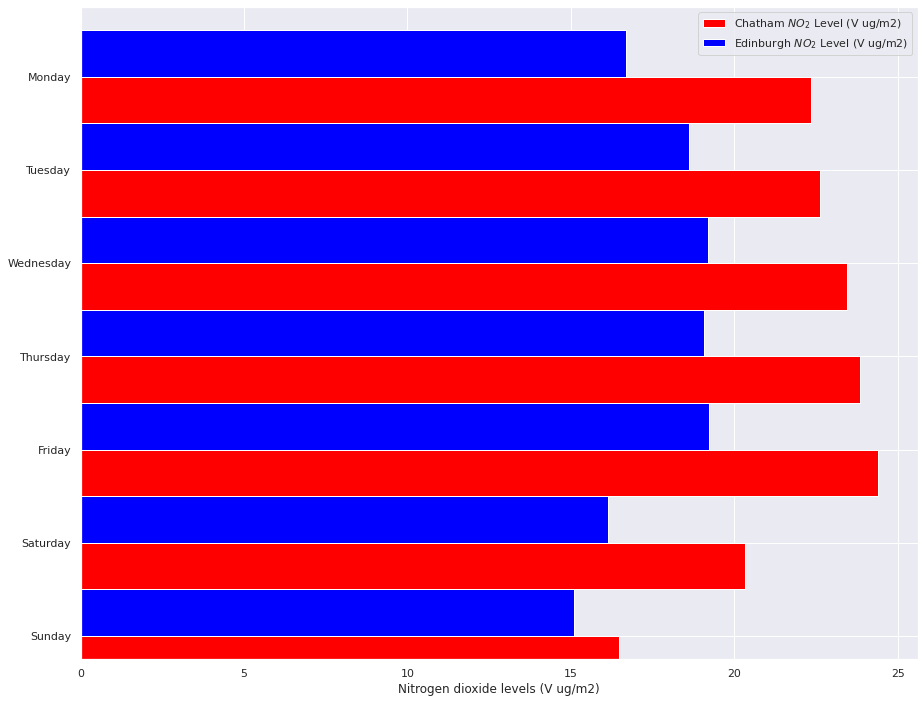

In [88]:
from pandas.api.types import CategoricalDtype

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_ave['Day_of_the_week'] = pd.Categorical(weekly_ave['Day_of_the_week'], categories=cats, ordered=True)
weekly_ave = weekly_ave.sort_values('Day_of_the_week')

x2 = weekly_ave['Day_of_the_week']
y3 = weekly_ave.Chatham_NO2_Level
y4 = weekly_ave.Edin_NO2_Level

do_bar_plot1(x2,y3,y4,"Nitrogen dioxide levels (V ug/m2)",['Chatham $NO_{2}$ Level (V ug/m2)', 'Edinburgh $NO_{2}$ Level (V ug/m2)'])

We see that from the descriptive statistics results, above, the over all mean is higher at Chatham compared to Edinburgh and so is the maximum value. But how does each measurement compare between the two? For this, we will use `.gt()` function. If $NO_{2}$ level is higher than Chatham, we will get a true if not it will be a false. 


In [89]:
Nitrogen_data['Bool_comparison'] = Nitrogen_data['Chatham_NO2_Level'].gt(Nitrogen_data['Edin_NO2_Level'])

In [90]:
Nitrogen_data['Bool_comparison']

8         True
9        False
10        True
12        True
13       False
         ...  
34948     True
34949     True
34950     True
34951     True
34952     True
Name: Bool_comparison, Length: 32565, dtype: bool

Let's use seaborn to do some visualisations of the comparisons. 

How many time during each day of the week has Chatham station shown higher levels of $NO_{2}$ compared to Edinburgh St. Leonard's street?

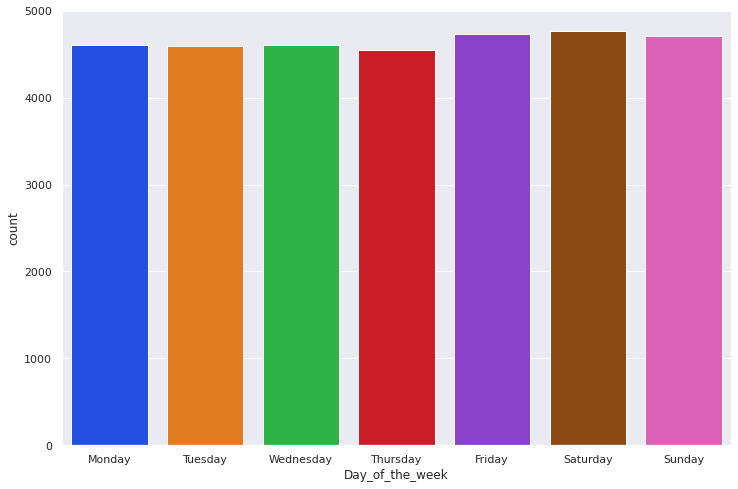

In [102]:
def do_count_plot(x, y):
  sns.set(rc={'figure.figsize':(12,8)})
  sns.set_palette("bright")
  order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  sns.countplot(x=x, data = y, order = order)
  return

do_count_plot(Nitrogen_data.Day_of_the_week, Nitrogen_data.Bool_comparison)

### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [92]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Edin.csv"
data = get_csv_data(url)
Edin_PM_data = data_clean_wrangle(data, "PM10 particulate matter (Hourly measured)","PM10 (V ugm-3)")

In [93]:
Edin_PM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             43848 non-null  datetime64[ns]
 1   Time             43848 non-null  object        
 2   PM10 (V ugm-3)   41755 non-null  float32       
 3   Weekdays         43848 non-null  int64         
 4   Day_of_the_week  43848 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.5+ MB


In [94]:
url =  "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/PM10_Kent.csv"
data = get_csv_data(url)
Chatham_PM_data = data_clean_wrangle(data, "PM10 Kent (Hourly measured)","PM10 (V ugm-3)")

In [95]:
Chatham_PM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             43848 non-null  datetime64[ns]
 1   Time             43848 non-null  object        
 2   PM10 (V ugm-3)   42258 non-null  float32       
 3   Weekdays         43848 non-null  int64         
 4   Day_of_the_week  43848 non-null  object        
dtypes: datetime64[ns](1), float32(1), int64(1), object(2)
memory usage: 1.5+ MB


### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
